# Lab 1a

In [1]:
import numpy as np

n = 100
mA = [1.0, 0.5]
mB = [-2.0, 0.0]
sigmaA = 0.5
sigmaB = 0.5

classA = np.random.randn(n, 2) * sigmaA + mA
classB = np.random.randn(n, 2) * sigmaB + mB

classA = classA.transpose()
classB = classB.transpose()

In [2]:
print(classA.shape)

(2, 100)


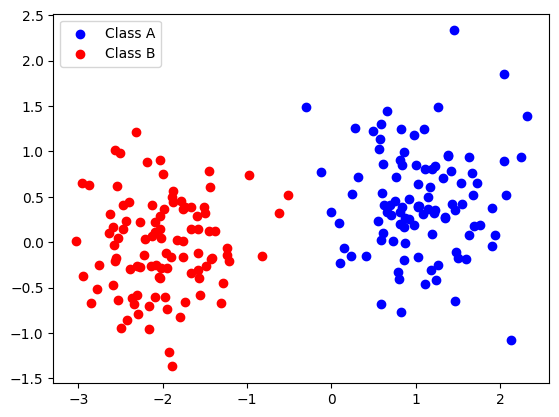

In [3]:
import matplotlib.pyplot as plt

plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.legend()
plt.show()




In [13]:
# Create input data, with bias term (one extra dimension)
classABias = np.concatenate((classA, np.ones((1, n))), axis=0)
classBBias = np.concatenate((classB, np.ones((1, n))), axis=0)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns = np.concatenate((classABias, classBBias), axis=1)

# Shuffle the inpput and target data, so we mix the classes
shuffled_indices = np.random.permutation(patterns.shape[1])

# Input data
patterns_shuffled = patterns[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))
targetsDelta_shuffled = targetsDelta[shuffled_indices]

# Target data (perceptron rule)
targetsPerc = np.concatenate((np.ones(classA.shape[1]), np.zeros(classB.shape[1])))
targetsPerc_shuffled = targetsPerc[shuffled_indices]

In [14]:
# print(patterns.shape)
print(targetsDelta_shuffled)

[ 1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.
  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1.
  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1.
 -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.
  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
  1.  1.]


In [10]:
print(patterns_shuffled)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.     

In [ ]:
def perceptron_rule(x):
    eta = 0.01
    w = np.random.rand(n,1)
    w_t = w.transpose()

    y_pred = x * w_t
